# Titanic Dataset Exploration
## by Sayan Chakraborty

## Preliminary Wrangling

> This analysis will contain an analysis of the tragic titanic event of 1912. The whole dataset is divided into 2 parts. The training and testing data. In general these are data for building a machine learning model. But in my case I will be doing a visualization of the analysis to come up with some idea on the tragic event without applying any regression models or any ML algorithms to do any kind of predictive analysis, since that is out of scope right now. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# in general we have 2 data files, divided into training and testing data.
# I will be looking at both the files for now. But in general since a predictive analysis is out of scope
# right now, I will be leaving out the testing data for doing a predictive analysis.

df_train = pd.read_csv('Dataset/titanic/train.csv')

In [3]:
# looking at the data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# getting an info of the data:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_train.shape

(891, 12)

### What is the structure of your dataset?

> This contains a total of 891 records with 12 feature sets which describe the data mainly.

### What is/are the main feature(s) of interest in your dataset?

> The dataset contains the following features in general: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']  

> In this case I think the main features which I should concentrate on are PassengerID, Survived, Pclass, Sex, Age, SibSp (this says the number of siblings/spouses abroad the titani), Parch (number of parents/children abroad the Titanic), fare, embarked.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The reason for selecting each of the data features are described as follows:  
1. PassengerId: To uniquely identify each passenger in the list  
2. Survived: This would be absoulely important on which we would be doing the analysis ie. to see under what conditions a passenger survived.  
3. pClass: This would be helpful because we can know if a particular pClass was affected the most  
4. Sex: This would be similarly important to understand if it was difficult for any particular gender to survive the disaster.  
5. Age: Similary, this would help in identifying which age group had a better chance of surviving.  
6. SibSp: This would help us understand on whether having any sibling/spouse onboard affected in any way.  
7. Parch: Similar to 6, this would help us understand whether having any parents onboard affected in any way.  
8. Fare: This would help us understand on whether if a person invested largely on their tickets, then probably they were in a higher class (just a hunch) and would probably get more benefits and preferences (which is how the world basically works!)  
9. Embarked: This would help in understanding whether at all the place of embarkment played any role. This feature can be dropped later on after analysis. If I find that this is not a significant feature and is not helping then I shall be dropping it. 

## Univariate Exploration

> In this section, investigations are done on distributions of individual variables. If any unusual points or outliers are seen then those are noted down and a relationship between the independent variables are observed.

### Dropping the columns which are not required for this analysis. 

In [8]:
# now firt I shall be dropping the columns which I described above as the ones which are not needed for the analysis
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


#### Looking at the columns which have null values

In [10]:
# finding the columns which have duplicate values. (I am not going to look at the data manually and note them down)
null_vals = df_train.columns[df_train.isnull().any()]
print('Columns with null values: \n', null_vals)

Columns with null values: 
 Index(['Age', 'Embarked'], dtype='object')


#### Looking at data with duplicate values

In [11]:
df_train.duplicated().any()

False

In [12]:
dupli_vals = df_train.columns[df_train.duplicated().any()]
print('Columns with duplicate values: \n', dupli_vals)

Columns with duplicate values: 
 []


> So basically there are no duplicate values in the dataframe

### Survival Counts

#### Let us plot a pie chart to see the survival list

In [13]:
df_train['Survived'].value_counts() # looking at the type of values in the survived column

0    549
1    342
Name: Survived, dtype: int64

> So I guess, 1 here stands for the people who survived and 0 are for the unfortunate ones.

In [14]:
# reusasble functions to plot pie charts:

def ppie(pie_labels, pie_values):
    fig = plt.figure(figsize =(9, 7)) 
    plt.pie(pie_values, labels = pie_labels);

Survived: ~62%
Unfortunate ones: ~38%


Text(0.5, 1.0, 'Suvived vs Unfortunate ones')

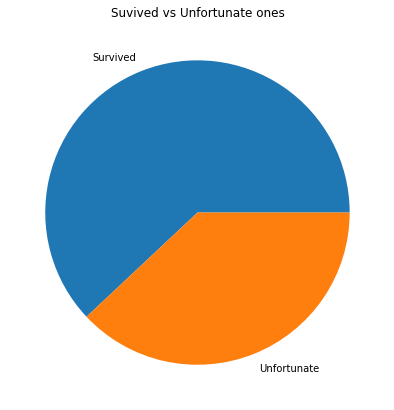

In [15]:
total_passengers = df_train.shape[0] # cannot write 891 here. direct hardcoding is not good practice if guess

temp_ls = list((df_train['Survived'].value_counts() / total_passengers) * 100)

pie_vals = list()
for val in temp_ls:
    pie_vals.append(round(val)) #rounding up the values and putting them in a list for plotting.
pie_labels = ['Survived', 'Unfortunate']
print('Survived: ~{}%'.format(pie_vals[0]))
print('Unfortunate ones: ~{}%'.format(pie_vals[1]))
ppie(pie_labels, pie_vals)

plt.title('Suvived vs Unfortunate ones')

> So it seems like there was around 38% of passengers who could not survive this tragic accident. We have a majority survival count of around 62%.

### Fares in the dataset

Another variable which we can look at is ` Fares `. Let us see how the fares were distributed. 

In [16]:
# how many unique kind of fares were there?
print('There were {} types of unique fares.'.format(len(df_train.Fare.unique())))

There were 248 types of unique fares.


Ok. So there were 248 types of unique fares. Fair enough. I am now interested on the following things:
1. Which was the most common fare?  
2. Which was the most uncommon fare?  
3. What is the fare range (min fare - max fare)?

In [17]:
# most common fares:
from collections import Counter

fare_counts = Counter(df_train['Fare'])

# finding the most common fare:
print('The most common fare is: ', fare_counts.most_common(1)[0][0], 'with a count of: ', fare_counts.most_common(1)[0][1])

The most common fare is:  8.05 with a count of:  43


In [18]:
# the top 3 most common fares:
fare_counts.most_common(3)

[(8.05, 43), (13.0, 42), (7.8958, 38)]

Text(0.5, 0, 'Count')

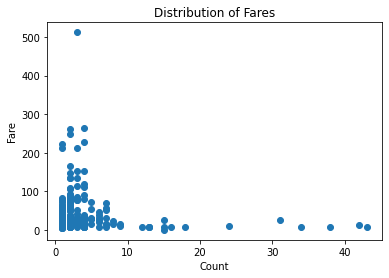

In [19]:
# we can plot a scatter chart to see the distribution of the fares
fares = list(fare_counts.keys())
each_count = list(fare_counts.values())
plt.scatter(x=each_count, y=fares)
plt.title('Distribution of Fares')
plt.ylabel('Fare')
plt.xlabel('Count')

> Looks like there's someone who payed around 500 for a single ticket! Looking at the max value would help us verify that.

> Considering the above scatter plot, although one can argue that paying 512 bucks back in 1912 was absolutely absurd, but its true. In this case this can be considered as the perfect outlier for the 'fares' column. Only out of curiosity I Just want to check which class this individual belongs to. 

In [20]:
# finding the maximum that anyone payed for a ticket
print('Maximum amount payed for a ticket: {}'.format(max(fares)))

Maximum amount payed for a ticket: 512.3292


In [21]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

> Maximum fare: 512.3292. Mimum is 0. Looks like someone was travelling for free!

> Just wanted to see how many classes there were. Will do a detailed analysis of the classes just after this fare analyisis.

In [22]:
df_train[df_train['Fare'] > 500]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,1,1,female,35.0,0,0,512.3292,C
679,680,1,1,male,36.0,0,1,512.3292,C
737,738,1,1,male,35.0,0,0,512.3292,C


> Ok, so now we can see there were 3 such people who paid an amount greater than 512 for their voyage. It looks like they all belonged to the first class (Pclass = 1), which also makes perfect sense.

### Passenger Classes in the dataset

In [23]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Distribution of Passenger Classes')

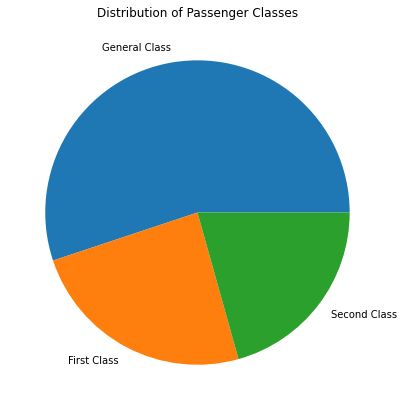

In [24]:
# looking at the distribution of the data
pClasses = Counter(df_train['Pclass'])
class_vals_int = list(pClasses.keys())

# creating the data list for pie chart
class_vals = list()
for cl in class_vals_int:
    if cl == 1:
        class_vals.append('First Class')
    elif cl == 2:
        class_vals.append('Second Class')
    elif cl == 3:
        class_vals.append('General Class')
    else:
        continue # ignoring if there were null values. Good to  have a safe ground in case there are values other than 1, 2, 3
class_counts = list(pClasses.values())

#plotting a pie chart to show the distribution
pie_labels = class_vals
ppie(pie_labels, class_counts)

plt.title('Distribution of Passenger Classes')

In [25]:
# verifying the most common class again:
pClasses.most_common()

[(3, 491), (1, 216), (2, 184)]

> So finally we can see that the most common class in the ship was the general class. Followed by first class and thereby second class.

### Looking at the genders

Text(0.5, 1.0, 'Distribution of genders')

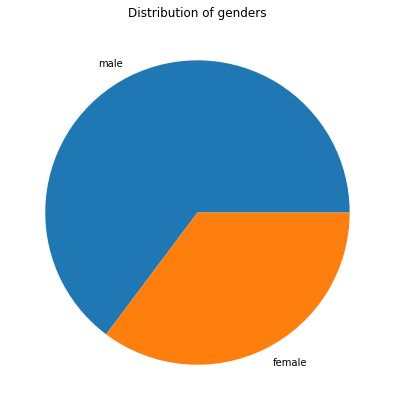

In [26]:
# looking at the distribution of the data
genders = Counter(df_train['Sex'])

#plotting a pie chart to show the distribution
ppie(genders.keys(), genders.values())

plt.title('Distribution of genders')

> So there were more males than females in the ship. 

### What percentage of people had siblings/spouces?

In [27]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0, 0.5, 'Count of passengers with sibligs')

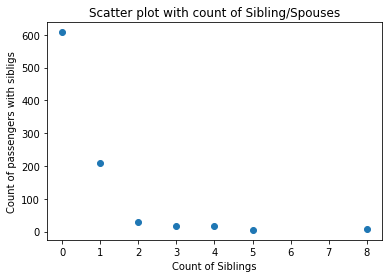

In [28]:
# plotting a scatter for the same
sibSp = Counter(df_train['SibSp'])
plt.scatter(x=sibSp.keys(), y=sibSp.values())
plt.title('Scatter plot with count of Sibling/Spouses')
plt.xlabel('Count of Siblings')
plt.ylabel('Count of passengers with sibligs')

> It seems like most of the values are in the zero range. Hence most of the people who boarded the train did not have any siblings/spouces along with them. We can look at the most common values too. 

In [29]:
sibSp.most_common()

[(0, 608), (1, 209), (2, 28), (4, 18), (3, 16), (8, 7), (5, 5)]

#### Finally finding out the *percentage* of people who had siblings/spouces while boarding

In [30]:
total_sibsp = 0
for x in sibSp:
    if (x > 0):
       total_sibsp += sibSp.get(x)

print('Total number of people who boarded with siblings/spouces: {}'.format(total_sibsp))
print('Percentage of people who boarded with siblings/spouces: {:.2f}%'.format((total_sibsp/total_passengers) * 100))

Total number of people who boarded with siblings/spouces: 283
Percentage of people who boarded with siblings/spouces: 31.76%


> There were 31.76% of people who boarded with their siblings / spouces.

### What percentage of people had parents?

In [31]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0, 0.5, 'Passenger count with parents')

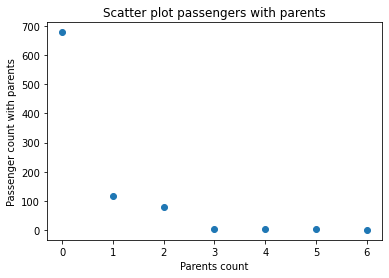

In [32]:
# plotting a scatter for the same
parch = Counter(df_train['Parch'])
plt.scatter(x=parch.keys(), y=parch.values())
plt.title('Scatter plot passengers with parents')
plt.xlabel('Parents count')
plt.ylabel('Passenger count with parents')

In [33]:
parch.most_common()

[(0, 678), (1, 118), (2, 80), (5, 5), (3, 5), (4, 4), (6, 1)]

In [34]:
total_parch = 0
for x in parch:
    if (x > 0):
       total_parch += parch.get(x)

print('Total number of people who boarded with their parents: {}'.format(total_parch))
print('Percentage of people who boarded with their parents: {:.2f}%'.format((total_parch/total_passengers) * 100))

Total number of people who boarded with their parents: 213
Percentage of people who boarded with their parents: 23.91%


> There were 31.76% of people who boarded with their siblings / spouces.

### Looking at the column 'Embarked'

In [35]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
# looking at the data descriptions, I know: C = Cherbourg, Q = Queenstown, S = Southampton
# changing the plot accordingly and removing the null values after checking how many there are

# checking the number of null values 
print('There are ', df_train['Embarked'].isnull().sum(), ' null values')

#dropping the null values
df_train['Embarked'].dropna(inplace=True)

df_train['Embarked'].isnull().any()

There are  2  null values


False

Text(0.5, 1.0, 'Distribution of embarked cities')

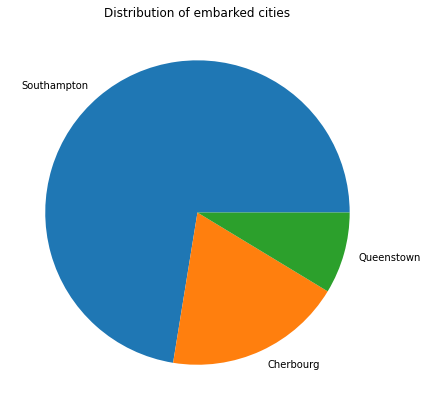

In [37]:
embks = Counter(df_train['Embarked'])
labels = list()
for val in embks.keys():
    if val == 'S':
        labels.append('Southampton')
    elif val == 'C':
        labels.append('Cherbourg')
    elif val == 'Q':
        labels.append('Queenstown')
        
ppie(labels, embks.values())

plt.title('Distribution of embarked cities')

> So most of the people boarded from Southhampton

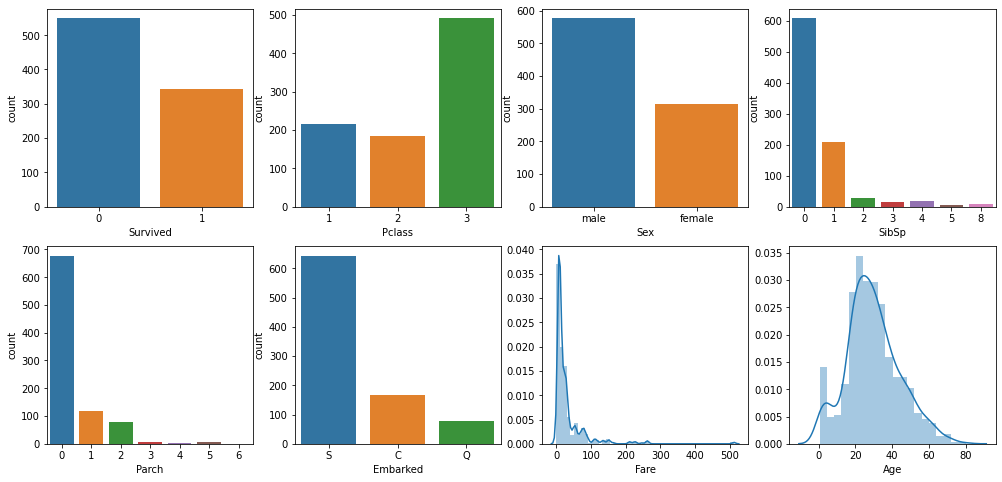

In [38]:
ig, axes = plt.subplots(2, 4, figsize = (17, 8))

sns.countplot('Survived', data = df_train, ax = axes[0,0])
sns.countplot('Pclass', data = df_train, ax = axes[0,1])
sns.countplot('Sex', data = df_train,ax = axes[0,2])
sns.countplot('SibSp', data = df_train, ax = axes[0,3])
sns.countplot('Parch', data = df_train, ax = axes[1,0])
sns.countplot('Embarked', data = df_train, ax = axes[1,1])
sns.distplot(df_train['Fare'], kde = True, ax = axes[1,2])
sns.distplot(df_train['Age'].dropna(), kde = True, ax = axes[1,3])

> This final graph shows a combined vizualization of all the individual features and their distributions. 

## Bivariate Exploration

> In this section, investigations are done to find out the relationships between pairs of variables in the
data.

Now, since our main motivation is to analyze the data based on the number of people who survived the incident, I would like to go for a bivariate anlysis which would show the following relationships:  

1. survived vs pclass
2. survived vs sex
3. survived vs sibsp
4. survived vs parch
5. survived vs fare
6. survived vs age

These 'vs' suggests nothing but how the second feature is related with the number of people who survived. Eg. Can we analyse something from the gender an individual had? Does it mean that a particular category of gender had better chances of survival than the other one and so on.

### Survived vs Pclass

Text(0.5, 0, 'Survival Average')

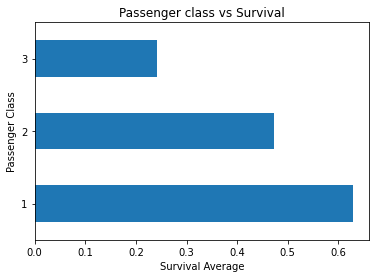

In [39]:
# taking the mean of the people who survived according to their classes. 
df_train.groupby('Pclass')['Survived'].mean().plot(kind='barh')
plt.title('Passenger class vs Survival')
plt.ylabel('Passenger Class')
plt.xlabel('Survival Average')

> This shows that if you belonged to the first class then you had a better chance of survival. The better class you were on the better chances there were of survival. Which does make sense. 

### Survived vs Gender

Text(0.5, 0, 'Survival Average')

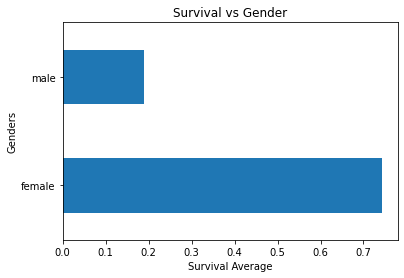

In [40]:
# taking the mean of the people who survived according to their genders. 
df_train.groupby('Sex')['Survived'].mean().plot(kind='barh')
plt.title('Survival vs Gender')
plt.ylabel('Genders')
plt.xlabel('Survival Average')

> This shows that there were better chances of survival if you were a female. 

### Survival chances with a sibling or spouse

Text(0.5, 0, 'Survival Average')

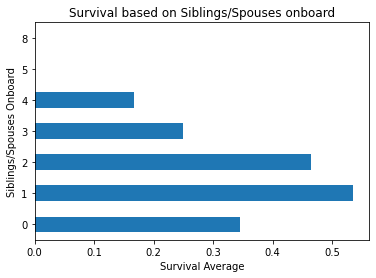

In [41]:
# taking the mean of the people who survived if they boarded with a sibling or spouse. 
df_train.groupby('SibSp')['Survived'].mean().plot(kind='barh')
plt.title('Survival based on Siblings/Spouses onboard')
plt.ylabel('Siblings/Spouses Onboard')
plt.xlabel('Survival Average')

> This shows that people who had a either 1 or 2 siblings/spouses onboard with them had a better chance of survival.

### Survival chances with a parent onboard

Text(0.5, 0, 'Survival Average')

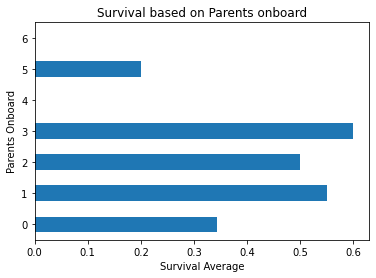

In [42]:
# taking the mean of the people who survived if they boarded with a parent. 
df_train.groupby('Parch')['Survived'].mean().plot(kind='barh')
plt.title('Survival based on Parents onboard')
plt.ylabel('Parents Onboard')
plt.xlabel('Survival Average')

> This is a bit weird I don't understnad how someone can have upto 5 or 6 parents. Nevertheless, I guess they are considering people who are in direct blood relationship with someone in the 'Parch' category, like uncles or aunts. So under these circustances from the above chart we can see that individuals onboarding with 3 parents had a better chance of survival followed by the ones boarding with 1 and then 2.

### Survival chances vs Fares given

Text(0.5, 0, 'Survival Average')

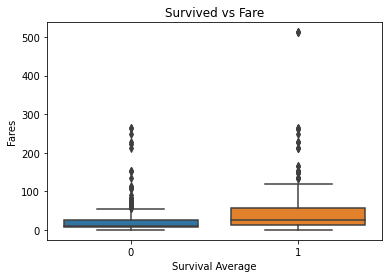

In [43]:
# let us plot a boxplot here, otherwise bar charts would not be able to render 248 values of fares.
sns.boxplot(x = "Survived", y = "Fare", data = df_train)
plt.title('Survived vs Fare')
plt.ylabel('Fares')
plt.xlabel('Survival Average')

> Of couse those few people paying that 512 bucks survived!  
Other than that it seems like higher you paid, a slight higher were the chances of you surviving.  
For the people who survived the fares ranged from 0 to all the way 512, with the IQR of around 10-55.  
For the unfortunate ones the fares ranged from 0 to around 290 with an IQR or around 10-30.

### Survival vs Age

Text(0.5, 0, 'Survival Average')

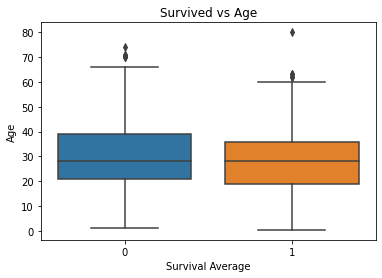

In [44]:
# similar with ages, Box plots would be a better mode to visualize these
sns.boxplot(x = "Survived", y = "Age", data = df_train)
plt.title('Survived vs Age')
plt.ylabel('Age')
plt.xlabel('Survival Average')

> It seems like people who were fortunate enough were on the age group of 0-80 with the IQR around 20-38. And for the unfortunate ones they were almost in a similar age group: around 0-77, with the IQR of around 20-40.

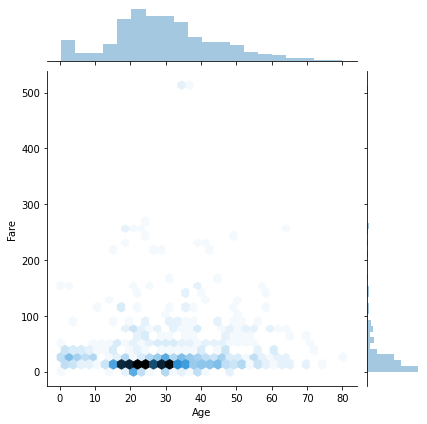

In [45]:
# let me just check if ages and fares were co-related in any way. We can go with a jointplot. 
# I'll be using a hex plot here, to show the correlations better.

sns.jointplot("Age", "Fare", data = df_train, kind='hex');

Ok, so from the above plot we can see that the age groups around 20-30 has a strong correlation with the fare range of around 30 I guess. 

## Multivariate Exploration

> In this section, investigations are done to find out the relationships between multiple variables in the
data.

Constructing a Coorelation matrix to show the heatmaps of the values which are of integer (int64) and float (float64) types.

Text(0.5, 1.0, 'Heatmap to show the coorelation betewen the different features')

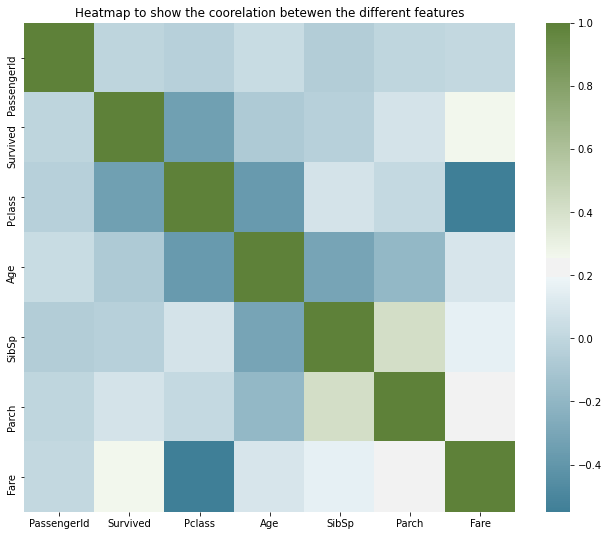

In [46]:
fig, cust_axis = plt.subplots(figsize=(11, 9))

multi_corr = df_train.corr()

sns.heatmap(multi_corr,
            mask   = np.zeros_like(multi_corr, dtype = np.bool), 
            cmap   = sns.diverging_palette(225, 112, as_cmap = True),
            square = False, 
            ax     = cust_axis)
plt.title('Heatmap to show the coorelation betewen the different features')

From the above heatmap we can conclude the following:

1. There is a positve coorelation between the fares and the number of people who survived.  
2. There is a negative coorelation between the passenger class and the number of people who surived.
3. There is a negative coorelation between the fares and the passenger class. 
4. There is also a negative coorelation between the ages and the passenger classes.